# HOME PRICE PREDICTION _ LINEAR REGRESSION
- Dependent Variable     : Price
- Independent Variable   : except price column
- To get good accuracy in Model we use ONE HOT ENCOING 

**One hot encoding is a process by which categorical variables are converted into a Numerical functions**

In [10]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
model=LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


os.chdir("C:\\Users\\Home\\Desktop\\Dataset")
home_price=pd.read_csv("homeprices.csv")
home_price.sample(1)

,town,area,price
12,robinsville,3600,695000


In [11]:
home_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
town     13 non-null object
area     13 non-null int64
price    13 non-null int64
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


## Featuring Engineering
- Missing Treatment
- One Hot Encoding
- Co-relation

-  Missing treatment

In [12]:
home_price.isnull().sum().sum()

0

- One Hot Encoding Using Pandas

In [23]:
#town is a object data type :one hot encoding is done
home_price.town.unique()

array(['monroe township', 'west windsor', 'robinsville'], dtype=object)

In [24]:
home_p=pd.get_dummies(home_price,columns=["town"],drop_first=True)
home_p.sample()

,area,price,town_robinsville,town_west windsor
6,2800,615000,0,1


- checking co_relation

In [25]:
co_relation=home_p.corr()
co_relation

,area,price,town_robinsville,town_west windsor
area,1.000000,0.931848,-0.146993,-0.108775
price,0.931848,1.000000,-0.081054,0.129686
town_robinsville,-0.146993,-0.081054,1.000000,-0.444444
town_west windsor,-0.108775,0.129686,-0.444444,1.000000


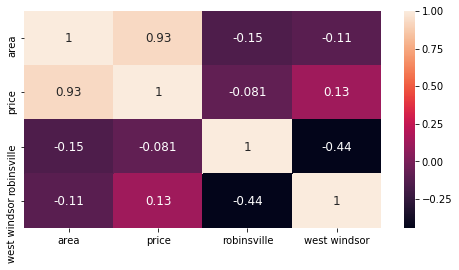

In [22]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(co_relation, annot = True, annot_kws={'size': 12})

# Model Building

In [26]:
x=home_p.drop(["price"],axis="columns")   #IDV
y=home_p["price"]                         #DV

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [40]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
pred=model.predict(x_test)

In [42]:
df=pd.DataFrame(data=[pred,y_test])
df.T

,0,1
0,602737.068966,615000.0
1,635000.000000,620000.0
2,713168.103448,725000.0
3,610129.310345,600000.0


## Validation of model
- High Rsqr
- Low Mape (mean absolute percentage /mean absolute error)
- fit chart

In [43]:
aa = r2_score(y_test, pred)
bb = mean_absolute_error(y_test, pred)
cc = mean_squared_error(y_test, pred)

print('r2_score: ', aa)
print('mae: ', bb)
print('mse: ', cc)

r2_score:  0.9372613013574665
mae:  12306.034482757968
mse:  154494045.4072386
